In [2]:
import pandas as pd

In [3]:
# Load the dataset
file_path = 'telco_churn.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


There are two integer columns (**SeniorCitizen, tenure**), one float column (**MonthlyCharges**), and the rest are object (string) type.

Notably, TotalCharges is listed as an object, which suggests it might contain non-numeric values or is formatted incorrectly.

**SeniorCitizen**: It's a binary indicator (0 or 1), with an average value of about 0.16, suggesting that about 16% of the customers are senior citizens.

**tenure**: The average tenure is around 32 months, with a wide range (0 to 72 months).

**MonthlyCharges**: Monthly charges vary significantly among customers, ranging from 18.25 to 118.75.

**Next Steps**:

Examine 'TotalCharges': We need to investigate why TotalCharges is an object type. It should be converted to a numeric type for analysis.

Deeper EDA: Perform more detailed exploratory data analysis to understand the distributions of various features and their relationships, especially with the target variable Churn.

In [6]:
# Investigating the 'TotalCharges' column
# Attempting to convert it to numeric and checking for non-numeric values

# Convert TotalCharges to numeric and coerce errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for any newly created NaN values in TotalCharges
total_charges_nan = data['TotalCharges'].isna().sum()

total_charges_nan

11

Upon examining the rows with NaN values in the TotalCharges column, a common characteristic is observed: all these customers have a tenure of 0. This suggests that these customers are new and have not yet been billed, which explains the absence of total charges.

**Handling Strategy**:

Remove Rows: Since these are new customers without historical data on charges or churn, removing these 11 rows might be preferable, especially if the focus is on more established customers.

In [7]:
# Examining rows where TotalCharges is NaN
nan_total_charges_rows = data[data['TotalCharges'].isna()]

nan_total_charges_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
# Removing rows where TotalCharges is NaN
data_cleaned = data.dropna(subset=['TotalCharges'])

# Checking the shape of the dataset after removal
new_shape = data_cleaned.shape

new_shape

(7032, 21)

The rows with NaN values in the TotalCharges column have been removed. The dataset now contains 7,032 entries and 21 columns.

**Exploratory Data Analysis (EDA)**:

We'll start with Univariate Analysis to understand the distribution of individual variables, followed by Bivariate Analysis to explore relationships between features, particularly with the target variable Churn. Finally, we'll perform a Correlation Analysis.

**Univariate Analysis**:

We'll look at the distribution of key variables, both numerical and categorical.

Distribution of tenure, MonthlyCharges, and TotalCharges.

Distribution of categorical variables like gender, SeniorCitizen, Partner, Dependents, PhoneService, etc.

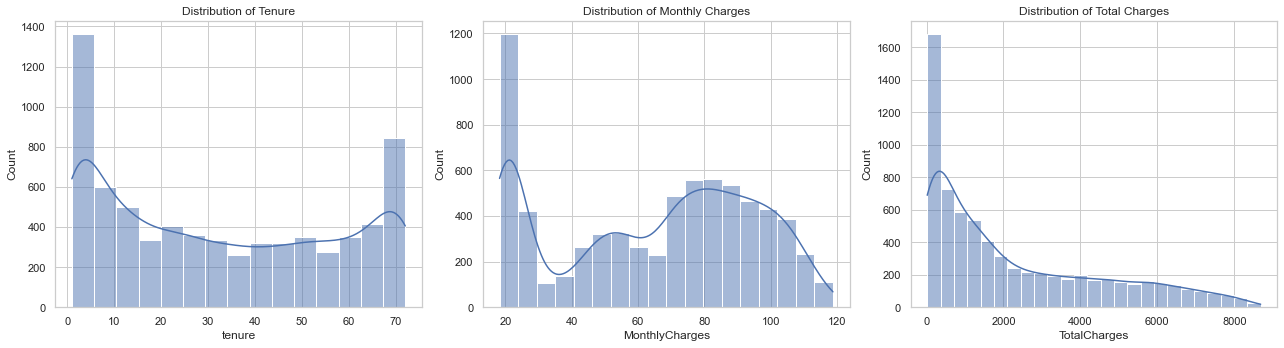

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Univariate Analysis: Distribution of numerical variables
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Distribution of tenure
sns.histplot(data_cleaned['tenure'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of Tenure')

# Distribution of MonthlyCharges
sns.histplot(data_cleaned['MonthlyCharges'], kde=True, ax=ax[1])
ax[1].set_title('Distribution of Monthly Charges')

# Distribution of TotalCharges
sns.histplot(data_cleaned['TotalCharges'], kde=True, ax=ax[2])
ax[2].set_title('Distribution of Total Charges')

plt.tight_layout()
plt.show()



**Tenure**: The distribution shows two peaks, suggesting two groups of customers - those who are relatively new (low tenure) and those who have been with the company for a longer time (high tenure).

**MonthlyCharges**: This distribution is somewhat bimodal, with one peak at the lower end and another at the higher end, indicating groups of customers with different service plans or packages.

**TotalCharges**: The distribution is right-skewed, indicating that many customers have lower total charges, which could be due to either lower monthly charges or shorter tenure.

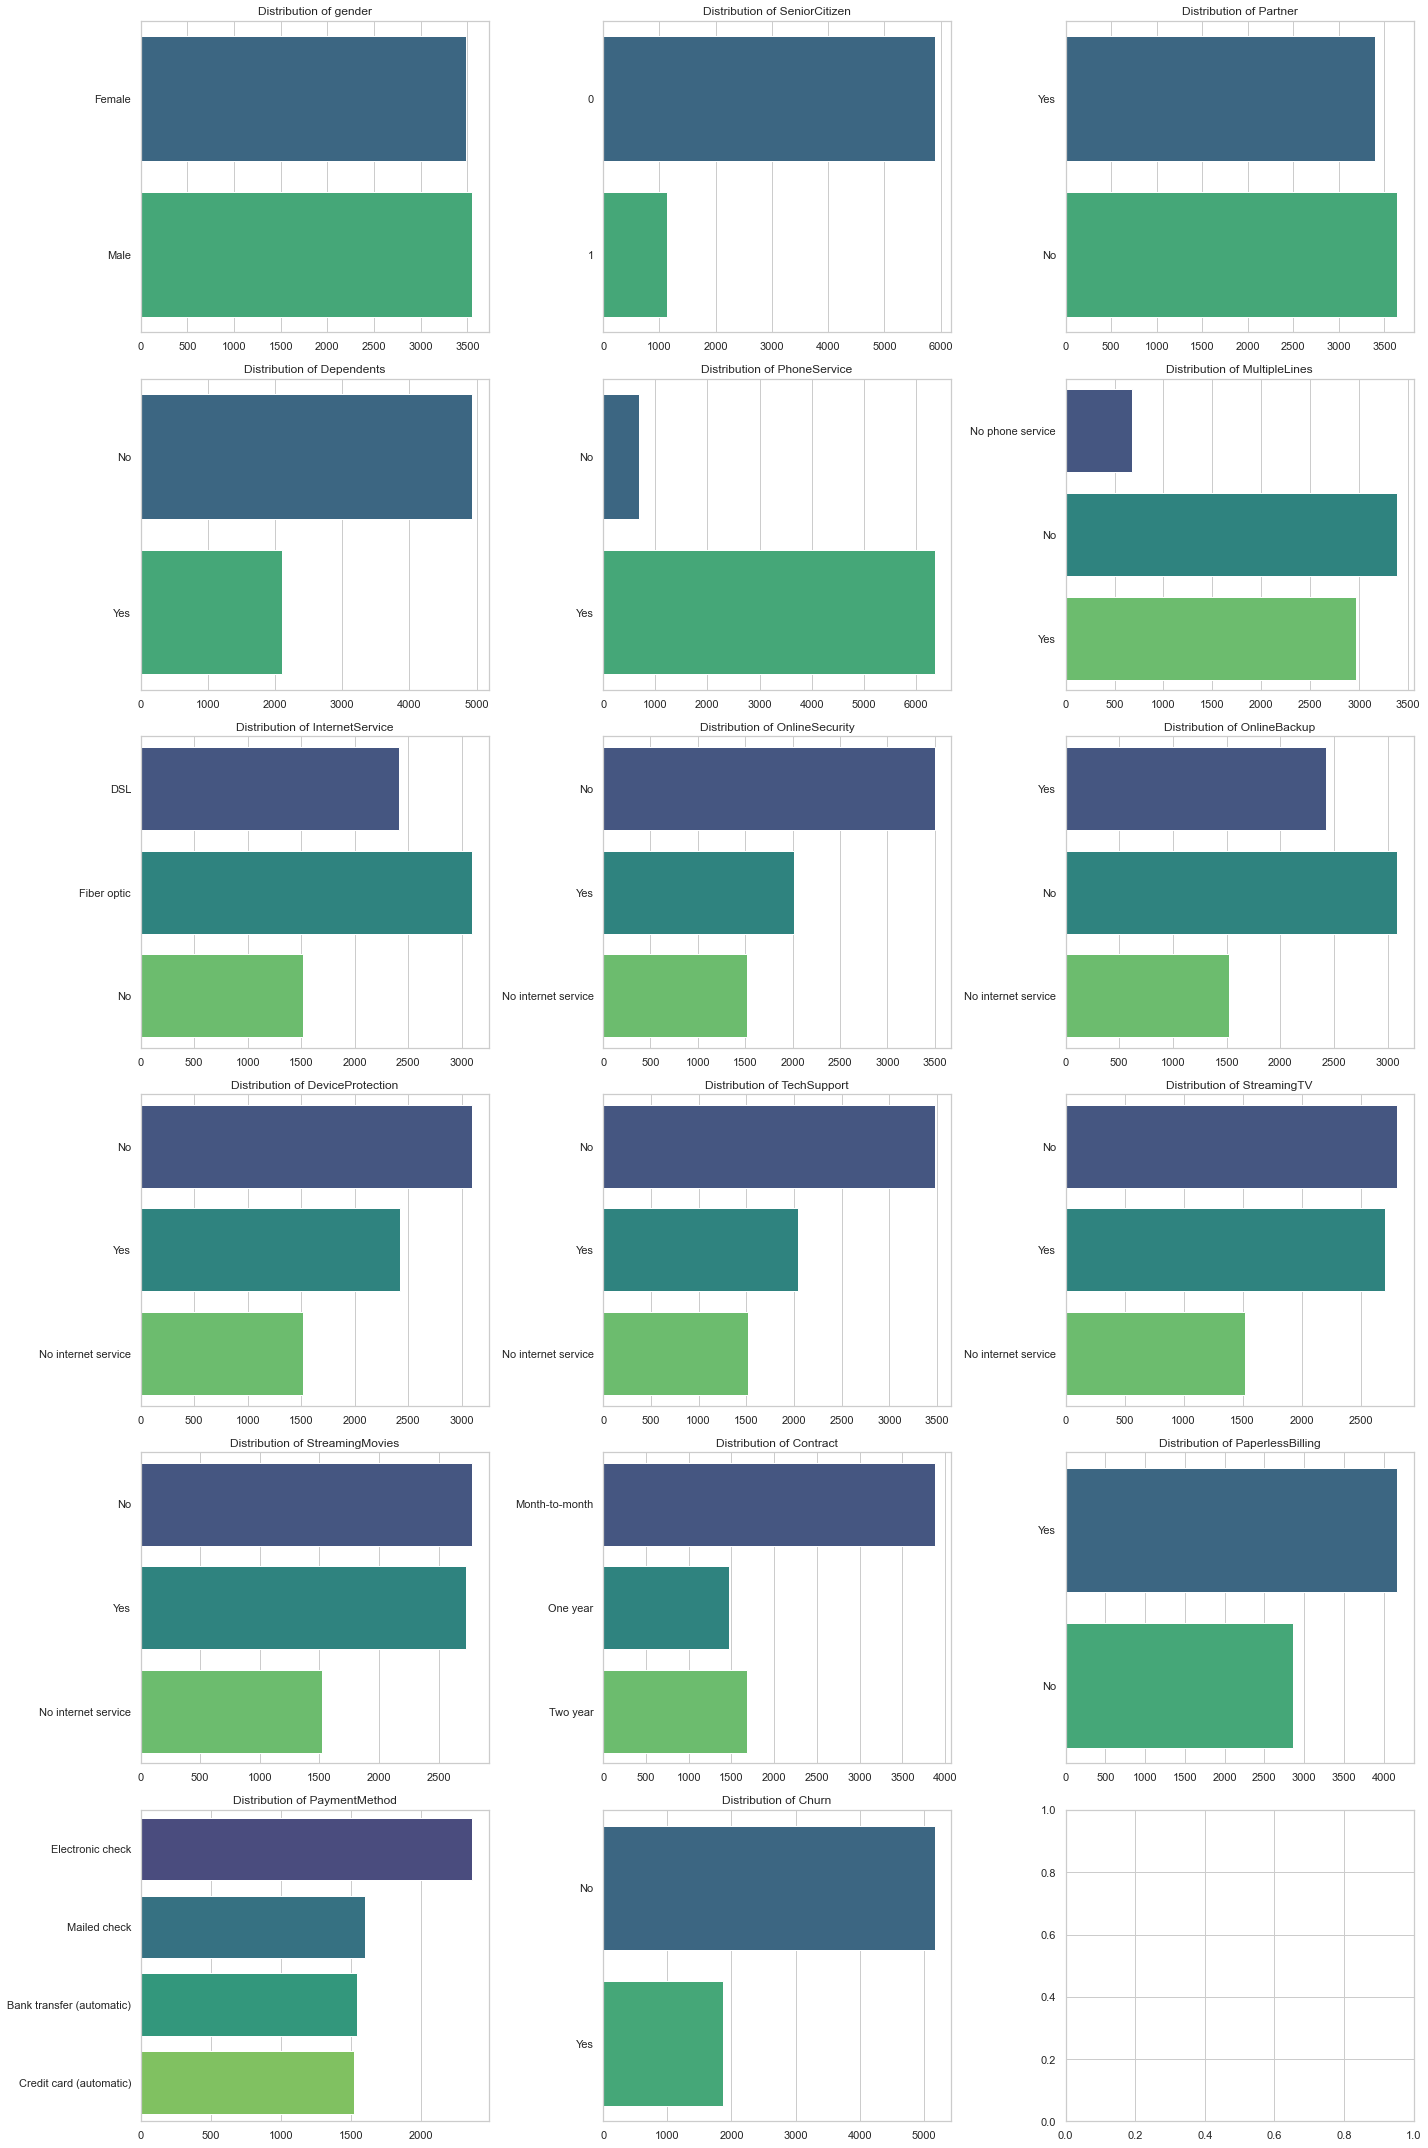

In [10]:
# Univariate Analysis: Distribution of categorical variables
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                       'PhoneService', 'MultipleLines', 'InternetService', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Plotting distributions of categorical variables
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(y=col, data=data_cleaned, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


**Gender**: The distribution between genders is fairly balanced.

**SeniorCitizen**: A smaller proportion of customers are senior citizens.

**Partner and Dependents**: There are more customers without partners or dependents than with.

**PhoneService**: Most customers have phone service.

**MultipleLines**: Customers are fairly evenly split between having multiple lines, no multiple lines, or no phone service.

**InternetService**: More customers have fiber optic internet service than DSL, and a significant number do not have internet service.

**OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport**: A majority of customers do not have these services.

**StreamingTV and StreamingMovies**: The customer base is roughly evenly split in these categories.

**Contract**: More customers are on a month-to-month contract compared to one-year or two-year contracts.

**PaperlessBilling**: A majority of customers have paperless billing.

**PaymentMethod**: Payment methods are fairly evenly distributed among electronic check, mailed check, bank transfer, and credit card.

**Churn**: The number of customers who have not churned is significantly higher than those who have.

**Bivariate analysis**:

For the bivariate analysis, we'll focus on how different features relate to the target variable Churn. This will help us understand which factors might be influencing customer churn more significantly. We'll explore this through various visualizations:

**Churn by Numerical Features**: Analyze tenure, MonthlyCharges, and TotalCharges in relation to churn.

**Churn by Categorical Features**: Look at the proportion of churn within each category of the categorical variables.

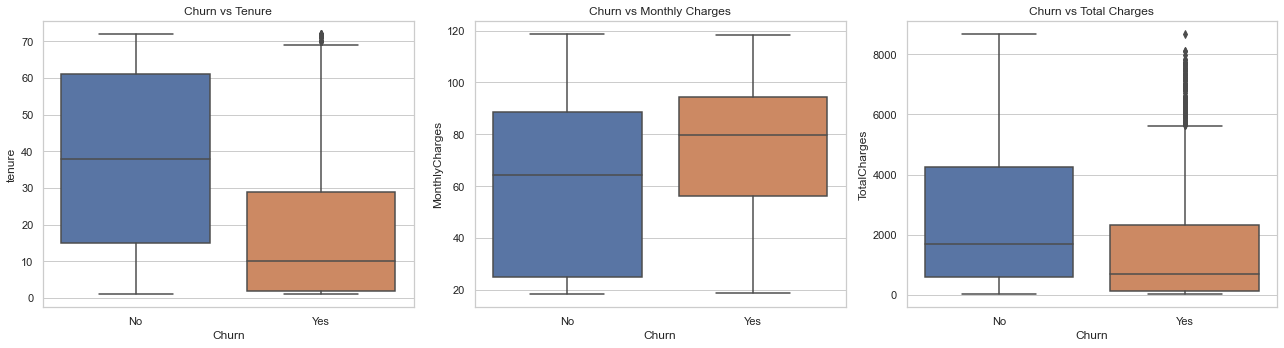

In [11]:
# Bivariate Analysis: Churn by Numerical Features

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Churn vs Tenure
sns.boxplot(x='Churn', y='tenure', data=data_cleaned, ax=ax[0])
ax[0].set_title('Churn vs Tenure')

# Churn vs MonthlyCharges
sns.boxplot(x='Churn', y='MonthlyCharges', data=data_cleaned, ax=ax[1])
ax[1].set_title('Churn vs Monthly Charges')

# Churn vs TotalCharges
sns.boxplot(x='Churn', y='TotalCharges', data=data_cleaned, ax=ax[2])
ax[2].set_title('Churn vs Total Charges')

plt.tight_layout()
plt.show()


**Churn vs Tenure**: Customers who churn tend to have a lower tenure. This suggests that newer customers are more likely to churn.
    
**Churn vs MonthlyCharges**: Customers with higher monthly charges are more likely to churn. This could indicate price sensitivity or dissatisfaction with the value for money.
    
**Churn vs TotalCharges**: The total charges for churned customers are generally lower, which aligns with the trend of lower tenure in churned customers.

Next, we will analyze the relationship between churn and the categorical variables. This will involve looking at the proportion of churn within each category of these variables. Let's proceed with this analysis

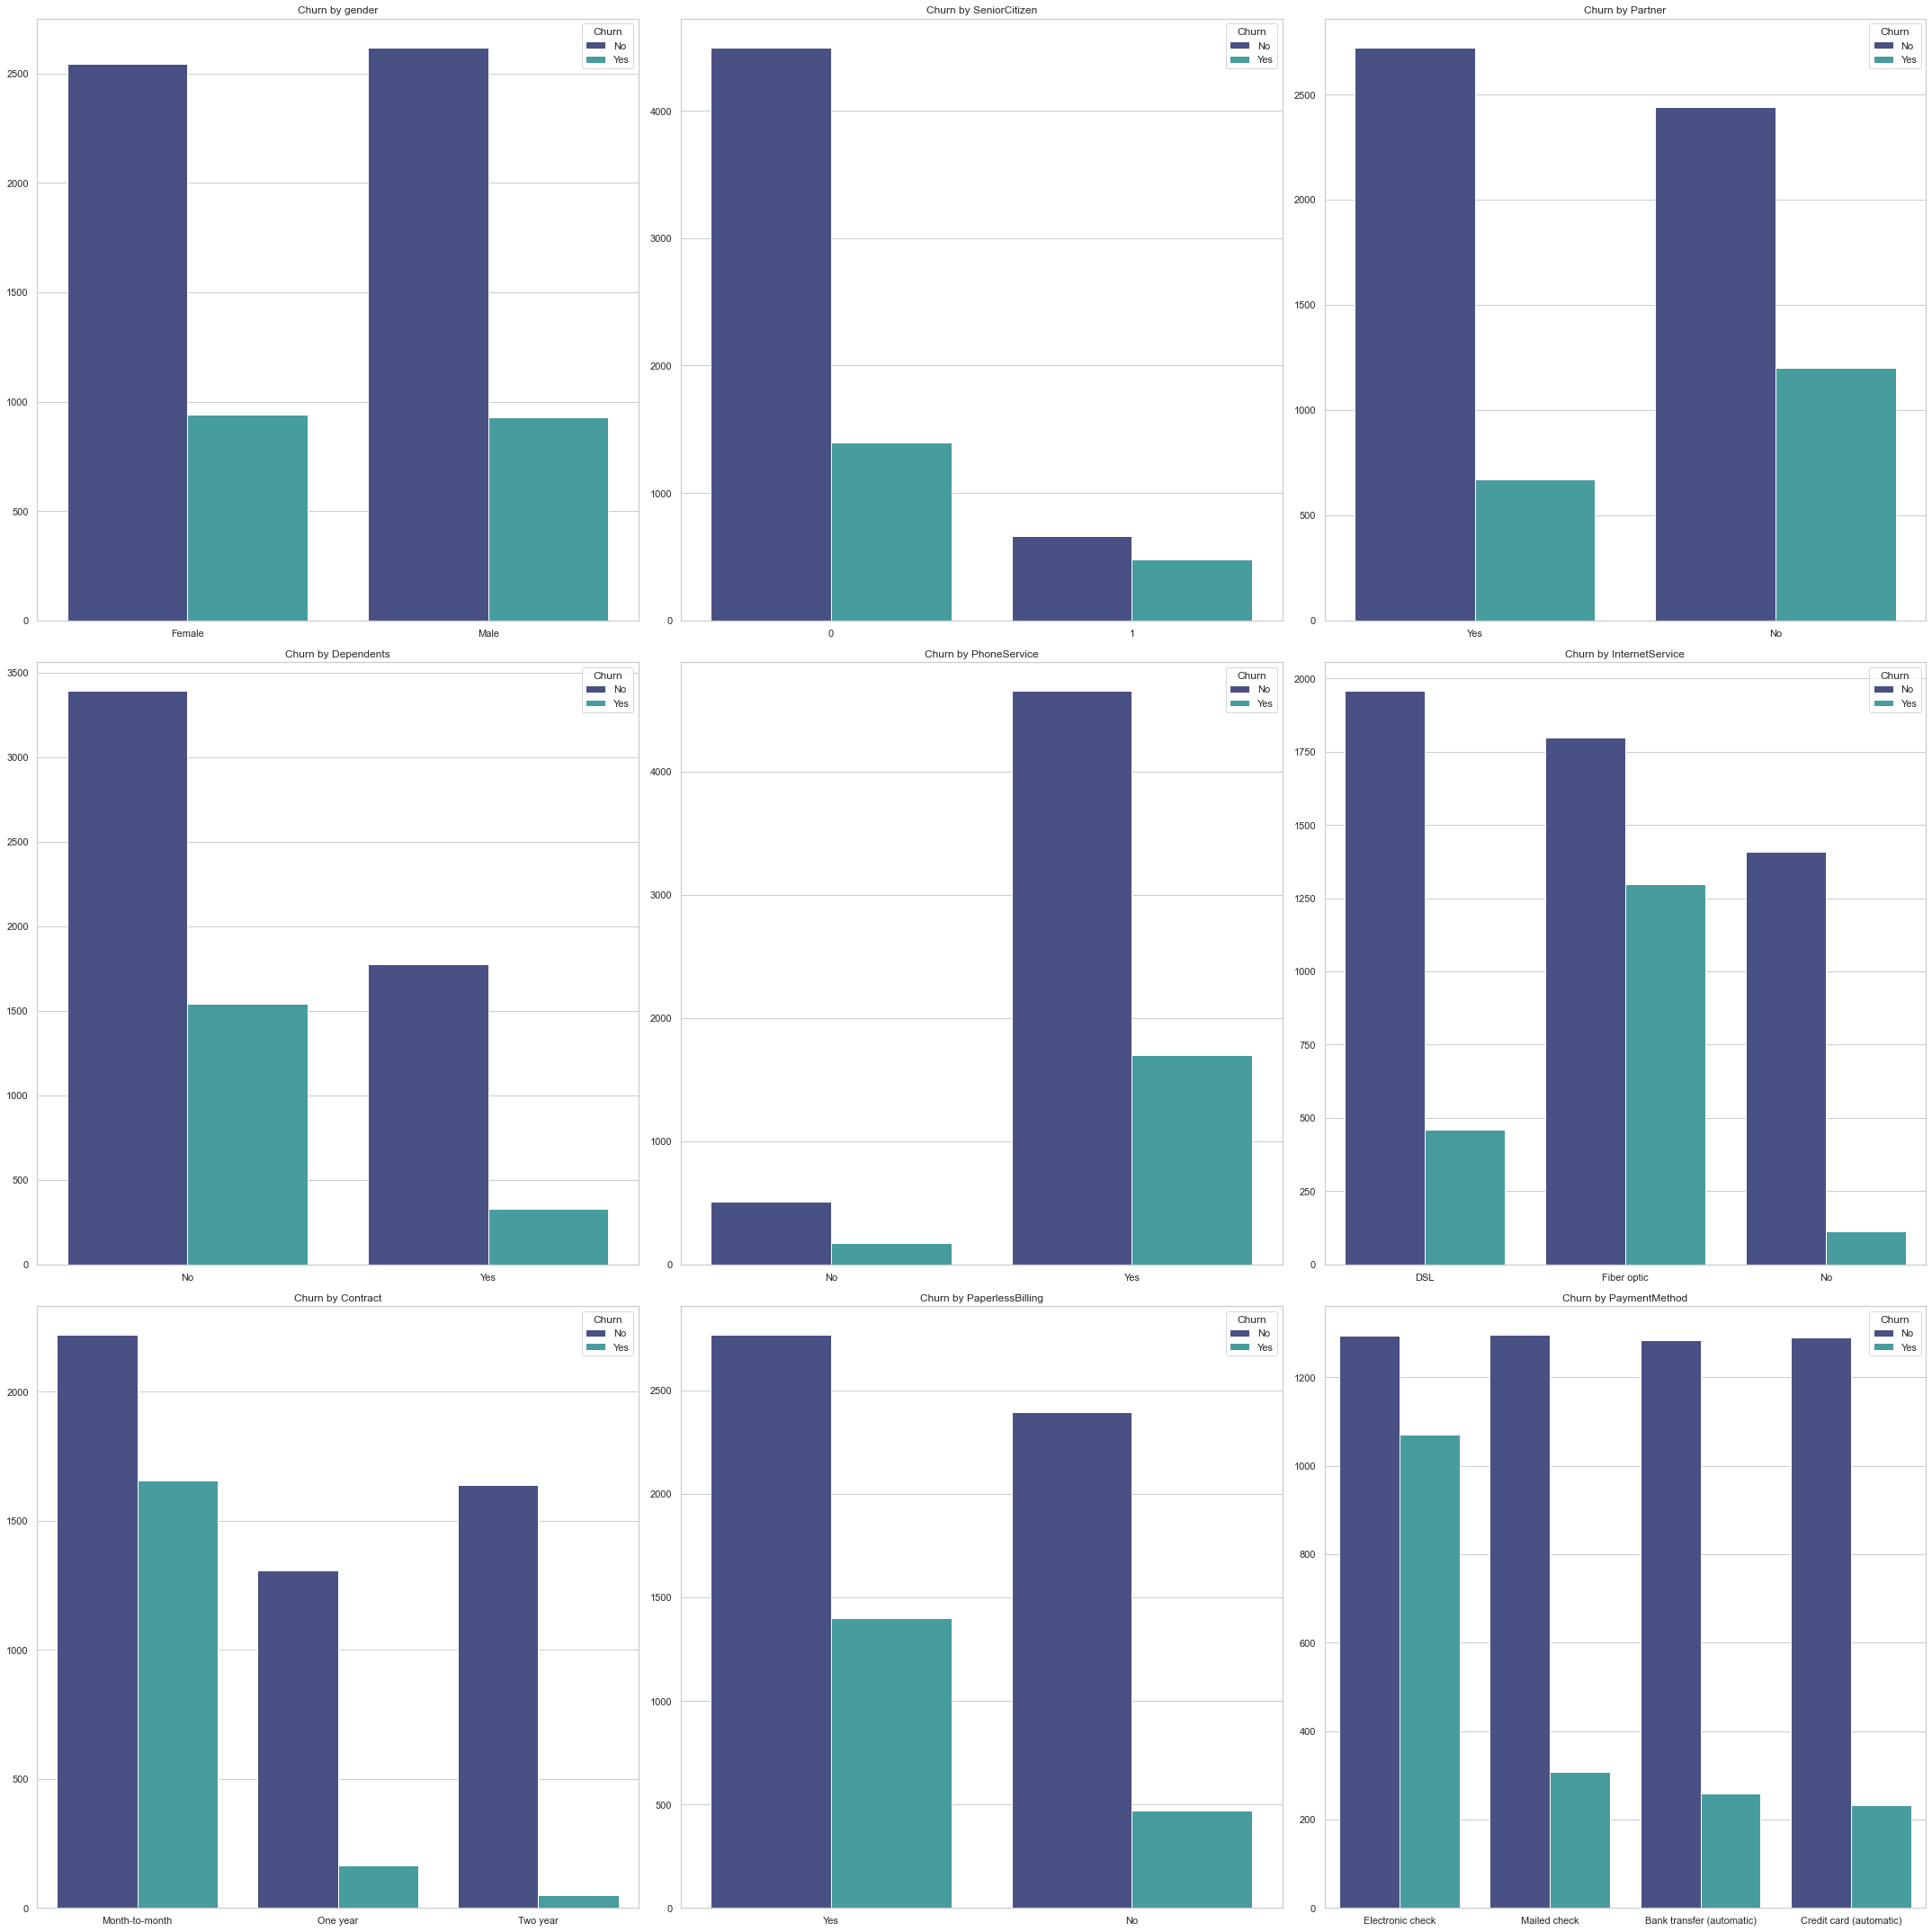

In [12]:
# Bivariate Analysis: Churn by Categorical Features

# Selecting a subset of categorical columns for clearer visualization
selected_categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                                'PhoneService', 'InternetService', 'Contract', 
                                'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))
axes = axes.flatten()

for i, col in enumerate(selected_categorical_columns):
    sns.countplot(x=col, hue='Churn', data=data_cleaned, ax=axes[i], palette="mako")
    axes[i].set_title(f'Churn by {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

**Gender**: Churn does not appear to vary significantly between genders.

**SeniorCitizen**: Senior citizens have a relatively higher churn rate compared to non-senior citizens.

**Partner**: Customers without partners churn more than those with partners.

**Dependents**: Similarly, customers without dependents have a higher churn rate.

**PhoneService**: The presence of phone service does not show a significant difference in churn rates.

**InternetService**: Customers with fiber optic internet service show a notably higher churn rate compared to those with DSL or no internet.

**Contract**: Customers on month-to-month contracts have a much higher churn rate compared to those on one-year or two-year contracts.

**PaperlessBilling**: Customers who use paperless billing have a higher churn rate.

**PaymentMethod**: The method of payment also influences churn rates, with customers using electronic checks showing a higher tendency to churn.

Let's perform a **correlation analysis** among the numerical variables to identify any significant relationships. This will help in understanding any interdependencies between these variables.

**Correlation Analysis:** This involves calculating the correlation coefficients between pairs of variables to determine the strength and direction of their linear relationship. The most common method is Pearson's correlation coefficient, which ranges from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no linear correlation. Correlation analysis is useful for identifying relationships and potential collinearity between variables.

We'll examine the correlations between **tenure, MonthlyCharges, and TotalCharges**. This will provide insights into how these variables are related to each other.

We'll visualize the correlations using a heatmap for easier interpretation.

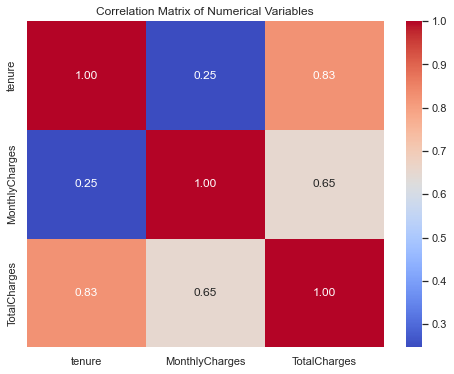

In [13]:
# Correlation Analysis among numerical variables
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
correlation_matrix = data_cleaned[numerical_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


**Tenure and TotalCharges**: There is a strong positive correlation (0.83) between tenure and TotalCharges. This is intuitive since longer tenure typically results in higher total charges over time.

**MonthlyCharges and TotalCharges**: There is a moderately positive correlation (0.65) between MonthlyCharges and TotalCharges. Higher monthly charges naturally contribute to higher total charges over the duration of the tenure.

**Tenure and MonthlyCharges**: The correlation is relatively low (0.25), suggesting that the length of tenure is not strongly related to the amount of monthly charges. This indicates that customers with both long and short tenures can have a wide range of monthly charges.